# Libraries for Computer Vision
* `torchvision` : Base domain library for PyTorch
* `torchvision.datsets` get data set and data loading for computer vision
* `torchvision.models`: get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms`: function for manipulating your vision data (images) to be suitable for use with ML model.
* `torch.utils.data.Dataset`: Base data set class for Pytorch
* `torch.utils.data.DataLoader`: Creates Python iterable over a Dataset

In [110]:
## Import pytorch

import torch
from torch import nn

#import torch vision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

## import matplotlib for visualization
import matplotlib.pyplot as plt

## Getting a Data set
* Fashion MNIST


In [111]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [112]:
# Setup Trainig data
train_data = datasets.FashionMNIST(
    root = 'data', # Where to download data to(Folder created in the colab)
    train = True, # do we want the training data set
    download = True, # do we want to download yes/no
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform = None # how do we want to trandform the labels / targets
)
# Setup Testing Data

test_data = datasets.FashionMNIST(
    root = 'data', # Where to download data to(Foilder Created in the colab)
    train = False, # do we want the training data set
    download = True, # do we want to download yes/no
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform = None # how do we want to trandform the labels / targets
)


In [113]:
len(train_data), len(test_data)

(60000, 10000)

In [114]:
image , label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### Checking the imageand label shape :
* image.shape -> [color_channel= 1, height = 28, width= 28]

* having color channel = 1 : gray image

In [115]:
#Shape of an image
image.shape

torch.Size([1, 28, 28])

In [116]:
## Lets see the type of classes present
number_of_classes =train_data.classes
number_of_classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Visualizing the data


Image Shape: torch.Size([1, 28, 28]) Label: 9


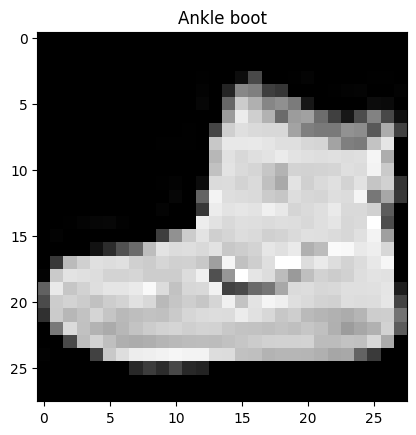

In [117]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image Shape: {image.shape} Label: {label}")
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(number_of_classes[label])
plt.show()

### Randomly look at the data

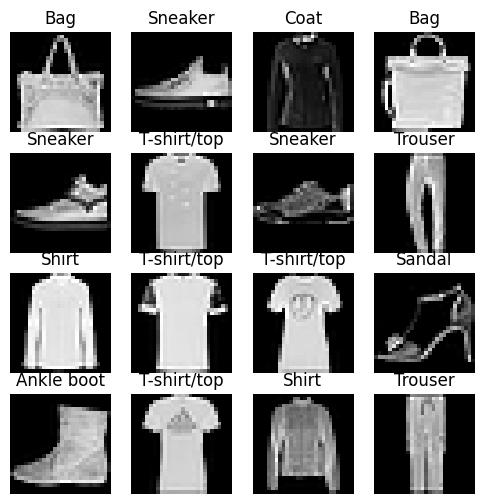

In [118]:
#torch.manual_seed(42)
rows, column = 4, 4
fig = plt.figure(figsize=(6,6))
for i in range(1, rows*column +1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, column, i)
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.title(number_of_classes[label])
  plt.axis(False)

## Preparing data Loader

* DataLoader makes the entire dta set in to small batches and minibatches
* Turning data into small bathces


In [119]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True
                              )

test_dataloader = DataLoader(dataset = test_data,
                             batch_size= BATCH_SIZE,
                             shuffle = False)

In [120]:
print(f"LEngth of trainDataLoader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"length of testDataLoader : {len(test_dataloader)} batches of {BATCH_SIZE}")

LEngth of trainDataLoader : 1875 batches of 32
length of testDataLoader : 313 batches of 32


### Checking whast inside the training data loader

In [121]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

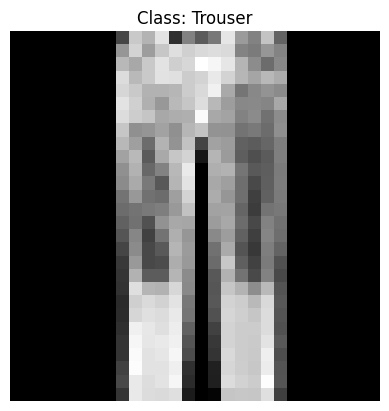

In [122]:
# Random index within the batch
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

# Select the image and label
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

# Visualize the image
plt.imshow(img.squeeze(), cmap='gray')  # Use .squeeze() for grayscale
plt.title(f"Class: {number_of_classes[label.item()]}")  # Convert label to class name
plt.axis(False)
plt.show()


## model 0: Build a baseline

* Creating a flatten layer

In [123]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]
print(x.shape)

# passing the sample to the flatten mpdel

output = flatten_model(x)
print(output.shape)


torch.Size([1, 28, 28])
torch.Size([1, 784])


In [124]:
class modelv0(nn.Module):
  def __init__(self, input_shape: int, hidden_units : int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape)

    )

  def forward(self, x):
    return self.layer_stack(x)

In [125]:
torch.manual_seed(42)

model0 = modelv0(
    input_shape = 28*28,
    hidden_units = 10,
    output_shape= len(number_of_classes)
).to(device)
model0

modelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Setup loss , optimizer and evaluation metrics

* Loss function: since we are working with a multiclass data, our loss function will be `nn.CrossEntropyLoss()`
* optimize = SGD
* Evaluation metric:  accuracy

In [126]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [127]:
from helper_functions import accuracy_fn

# seting up loss function and optimizer
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model0.parameters(), lr = 0.1
                            )

#### Timer to calculate the time


In [128]:
import time

start_time = time.time()  # Record the start time

# code model in between

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time:.4f} seconds")

Time taken: 0.0000 seconds


### Creating training loop and traing a model on batches of data
* Loop through epochs
* loop through training batches, perform training steps, calculate the training loss "per batch"
* Lopp through testing batches, perform testing steps, calculate the test loss "per batch"
* Print out whats happening


In [129]:
from sklearn.metrics import accuracy_score

# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer

torch.manual_seed(42)
# START the TIMER
start_time = time.time()

epochs = 3

# creating training and test loop.

for epoch in tqdm(range(epochs)):
  print(f'Epochs: {epoch}\n----')

  train_loss = 0
  # Adding a lopp to lopp through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    # enumerate means that we are going batch by batch the batch here is theinder
    # we are having
    model0.train()
    # Foward Pass
    y_pred = model0(X.to(device))

    # Loss calculation
    loss = Loss(y_pred, y.to(device))
    # Convert tensor loss to Python float
    train_loss += loss.item() # accumulating the train loss

    # Optimizer zero grad
    optimizer.zero_grad()

    #Loss baclward
    loss.backward()

    # optmizer step
    optimizer.step()

    # Print out whats hapening
    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples.')
  # Divde total train loss with length of the train loader
  train_loss /= len(train_dataloader)

  test_loss, test_acc =0.0,0.0
  model0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # Forward Pass
      test_logit = model0(X_test.to(device))
      test_pred = test_logit.argmax(dim =1) # it will give the labels

      # backward Pass
      t_loss = Loss(test_logit, y_test.to(device))
      test_loss += t_loss.item()

      # calculate the accuracy
      # so we are comparing the labels with labels
      test_acc +=  accuracy_score(y_true = y_test.cpu().numpy(),
                                  y_pred = test_pred.cpu().numpy())*100

    # Calculate the tess loss avg per batch
    test_loss /= len(test_dataloader)
    # calculate the test accuracy per batch
    test_acc /= len(test_dataloader)

  print(f'\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test acc: {test_acc:.2f}')


end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time


print(f"Time taken: {elapsed_time:.4f} seconds")






  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
----
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train Loss: 0.5904 | Test Loss: 0.5095, Test acc: 82.04
Epochs: 1
----
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train Loss: 0.4763 | Test Loss: 0.4799, Test acc: 83.20
Epochs: 2
----
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train Loss: 0.4550 | Test Loss: 0.4766, Test acc: 83.43
Time taken: 35.7633 seconds


#### Make prediction and get model0 results

In [130]:
torch.manual_seed(42)

loss_eval, acc_eval = 0.0,0.0
model0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader):
    y_pred = model0(X.to(device))
    loss = Loss(y_pred, y.to(device))
    loss_eval += loss.item()

    acc_eval += accuracy_score(y_true = y.cpu().numpy(),
                               y_pred = y_pred.argmax(dim =1).cpu().numpy())*100

loss_eval /= len(test_dataloader)
acc_eval /= len(test_dataloader)

print(f'Loss: {loss_eval:.4f} | Accuracy: {acc_eval:.2f}')





  0%|          | 0/313 [00:00<?, ?it/s]

Loss: 0.4766 | Accuracy: 83.43


## Model 1: Building a better model with non-Linearity

### importing Librares

In [131]:
#Importing the Libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from sklearn.metrics import accuracy_score
import time

### Data Set Loading

In [132]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [133]:
train_data = datasets.FashionMNIST(
    root = 'data', # Where to download data to(Folder created in the colab)
    train = True, # do we want the training data set
    download = True, # do we want to download yes/no
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform = None # how do we want to trandform the labels / targets
)

test_data = datasets.FashionMNIST(
    root = 'data', # Where to download data to(Foilder Created in the colab)
    train = False, # do we want the training data set
    download = True, # do we want to download yes/no
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform = None # how do we want to trandform the labels / targets
)

### DataLoader Creationg for batch

In [134]:

Batch_size = 32
train_loader = DataLoader(dataset= train_data,
                          shuffle = True,
                          batch_size = Batch_size
                          )

test_loader = DataLoader(dataset = test_data,
                         shuffle = False,
                         batch_size = Batch_size)

### Model V1

In [135]:
class modelv1(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [136]:
output_shape = len(train_data.classes)
output_shape

10

In [137]:
## instances of the model
input_shape = 28*28
hidden_units = 10
output_shape = len(train_data.classes)

model1 = modelv1(input_shape,
                 hidden_units,
                 output_shape).to(device)
model1

modelv1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [138]:
## Loss and Optmizer
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model1.parameters(), lr = 0.1)

### Training and Testing loop

In [139]:
epochs = 3

torch.manual_seed(42)
# START the TIMER
from tqdm.auto import tqdm

start_time = time.time()

for epoch in tqdm(range(epochs)):
  for batch, (X_train,Y_train) in enumerate(train_loader):
    model1.train()
    # Forward Pass
    y_logits = model1(X_train.to(device))
    y_prob = torch.softmax(y_logits, dim =1)
    y_pred = torch.argmax(y_prob, dim = 1)

    # Loss
    loss = Loss(y_logits, Y_train.to(device))
    # accuracy
    acc = accuracy_score(y_true = Y_train.cpu().numpy(),
                         y_pred = y_pred.cpu().numpy() )
    # optimizer zero grad
    optimizer.zero_grad()
    # loss backward
    loss.backward()
    #optmizer step
    optimizer.step()

  # model evaluate

  for _, (X_test, y_test) in enumerate(test_loader):
    model1.eval()
    with torch.inference_mode():
      test_logits = model1(X_test.to(device))
      test_prob = torch.softmax(test_logits, dim = 1)
      test_pred = torch.argmax(test_prob, dim = 1)

      test_loss = Loss(test_logits, y_test.to(device))
      test_acc = accuracy_score(y_true = y_test.cpu().numpy(),
                                y_pred = test_pred.cpu().numpy())

  print(f'Epochs: {epoch}\n----')
  print(f'Train Loss: {loss:.4f} | Train Acc: {acc:.2f}')
  print(f'Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}')




end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time


print(f"Time taken: {elapsed_time:.4f} seconds")



  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
----
Train Loss: 0.4692 | Train Acc: 0.81
Test Loss: 0.3835 | Test Acc: 0.81
Epochs: 1
----
Train Loss: 0.5277 | Train Acc: 0.78
Test Loss: 0.2113 | Test Acc: 0.94
Epochs: 2
----
Train Loss: 0.4089 | Train Acc: 0.91
Test Loss: 0.1975 | Test Acc: 0.94
Time taken: 43.2524 seconds


#### Functionizing training loop and testing Loop
Let's create a function for
* Trining Loop: `train_step()`
* Testing Loop : `test_step()`

## ModelV2 = CNN

### Importing Libraries

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

import time

from sklearn.metrics import accuracy_score

### DataSet Loading


In [2]:
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.2MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 303kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.49MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 23.5MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
## Device Agnostic Code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Preparing DataLoader

In [4]:
Batch_size = 32

train_loader = DataLoader(dataset = train_data,
                          shuffle = True,
                          batch_size = Batch_size)

test_loader = DataLoader(dataset = test_data,
                         shuffle = False,
                         batch_size = Batch_size)

In [5]:
classes = train_data.classes
len(classes)

10

### CNN Model
* Its a 2 Block Model: `Conv1 -> ReLU() -> MaPool` --->> `Conv2 -> ReLU() -> MaPool`
* `input_size= 1`: It defines the number of input channels in the firstt convolution Layer(`nn.Conv2d`).
The Valuse `1` is typically used for the gray scale image that is only one channel.
* `input_size = 3` if the channel is RGB then the input channel will be 3(one for each channel: Red, Green and Blue)

In [6]:
class ModelV2(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    # Define the 1st Convolution layer Block
    self.Conv_Block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels= hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    # Defibe the 2nd Convolution layer Block
    self.Conv_Block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, # matchup with the previous layer out channels
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)

    )
    # Define the classifier layer
    self.Classifier = nn.Sequential(
        nn.Flatten(),
        #The in_features argument in the nn.Linear layer should be
        #calculated based on the output shape of the last convolutional block after flattening.
        #Currently, it is set to hidden_units, which is incorrect.
        #You need to calculate the number of features after the last MaxPool2d layer.
        nn.Linear(in_features = hidden_units*7*7, ## Need to be calculated
                 out_features = output_shape)
    )

  def forward(self, x):
    x = self.Conv_Block_1(x)
    #print("After Conv_Block_1",x.shape)
    x = self.Conv_Block_2(x)
    #print("After_Conv_Block 2",x.shape)
    x = self.Classifier( x)
    return x
############################## IMPORTANT ###################################
# Use above print statemet for the calculation of the Classifier Layer
# For this use a dummy image and pass it of the same size then
#we wil get to know easily


## creating the instance for the Model

In [7]:
INPUT_SHAPE = 1
HIDDEN_UNITS =10
OUTPUT_SHAPE = len(classes)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model2 = ModelV2(input_shape =INPUT_SHAPE,
                 hidden_units = HIDDEN_UNITS,
                 output_shape = OUTPUT_SHAPE).to(device)
model2

ModelV2(
  (Conv_Block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv_Block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Stepping through `nn.Conv2d`

In [13]:
## Lets create a dummy data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Create a batch of images
image = torch.randn(32,1,64,64).to(device)
test_image = image[0]
print(image)

tensor([[[[ 1.9269e+00,  1.4873e+00,  9.0072e-01,  ...,  1.8446e+00,
           -1.1845e+00,  1.3835e+00],
          [ 1.4451e+00,  8.5641e-01,  2.2181e+00,  ...,  3.3989e-01,
            7.1997e-01,  4.1141e-01],
          [ 1.9312e+00,  1.0119e+00, -1.4364e+00,  ..., -5.5580e-01,
            7.0427e-01,  7.0988e-01],
          ...,
          [-5.6103e-01, -4.8296e-01,  4.7696e-01,  ..., -2.7131e-01,
           -9.5366e-01, -6.7366e-01],
          [ 3.0757e-01, -1.2766e-01,  3.6591e-02,  ..., -2.0060e+00,
            2.8237e-01, -8.1112e-01],
          [-1.5486e+00,  4.8512e-02, -7.7123e-01,  ..., -1.4031e-01,
            9.4162e-01, -1.1843e-02]]],


        [[[-5.1969e-01,  1.8524e+00,  1.8365e+00,  ...,  8.9349e-01,
           -1.5114e+00, -8.5147e-01],
          [ 2.0818e+00,  1.0677e+00, -1.4277e+00,  ...,  1.6612e+00,
           -2.6223e+00, -4.3193e-01],
          [-1.0099e-01, -4.3878e-01, -1.9775e+00,  ...,  2.1060e-01,
            2.5360e-01, -7.3184e-01],
          ...,
   

In [14]:
test_image.shape

torch.Size([1, 64, 64])

In [16]:
conv_layer = nn.Conv2d(in_channels = 1,
                       out_channels = 10,
                       kernel_size  = 3,
                       stride = 1,
                       padding = 1
                       ).to(device)
conv_layer

#Pass the data throug the convolution LAyer

output_conv =conv_layer(test_image)
output_conv

tensor([[[-1.2092, -0.7907, -0.3311,  ..., -0.6100, -0.1572, -0.8263],
         [-0.5083,  0.1028, -0.5890,  ..., -0.5368,  0.2230, -0.5964],
         [-0.7048,  1.1704,  0.7979,  ...,  0.2404, -0.4757, -0.1548],
         ...,
         [-0.1170, -0.1749, -0.1123,  ...,  0.1325,  0.3027, -0.0834],
         [-0.2327, -0.1245, -0.3285,  ...,  0.0615, -0.9862, -0.3990],
         [ 0.0168, -0.3001, -0.0894,  ...,  0.2617, -1.2084, -0.1157]],

        [[-0.5907, -0.1812, -0.0607,  ...,  0.4435, -0.0974,  0.3552],
         [-0.9936,  0.3247,  0.6260,  ..., -0.2181,  0.6229, -0.4740],
         [-0.7560,  1.2538, -0.3776,  ...,  0.3415,  0.0936,  0.3029],
         ...,
         [ 0.3855,  0.4551,  0.1153,  ...,  0.7888,  0.0165,  0.7870],
         [ 0.8235, -0.0578,  0.1677,  ...,  1.2522,  0.3722,  0.5823],
         [ 0.3266,  0.6379,  0.2837,  ...,  0.8460, -0.4204,  0.5070]],

        [[-0.3670, -0.7108,  0.1471,  ...,  0.0941,  0.0100,  0.2588],
         [-0.2422,  0.7130,  1.2393,  ...,  0

In [17]:
output_conv.shape

torch.Size([10, 64, 64])

### stepping `nn.MaxPool2d`

In [18]:
max_pool = nn.MaxPool2d(kernel_size = 2)
output_pool =max_pool(output_conv)
output_pool.shape

torch.Size([10, 32, 32])

In [19]:
## dummy pass
image.shape

torch.Size([32, 1, 64, 64])

In [21]:
10*16*16

2560

In [22]:
# Pass the image from our model
#model2(image).shape

## Training the CNN Model

In [23]:
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model2.parameters(), lr = 0.1)


In [26]:
# Training Loop
from tqdm.auto import tqdm

start_time = time.time()


epochs = 3

for epoch in tqdm(range(epochs)):
  model2.train()
  train_loss, train_acc = 0.0,0.0
  for batch, (X,Y) in enumerate(train_loader):
    X = X.to(device)
    Y = Y.to(device)


    # Forward Pass

    y_logits = model2(X)
    y_prob = torch.softmax(y_logits, dim =1)
    y_pred = torch.argmax(y_prob, dim =1)

    # Loss and accuracy
    loss = Loss(y_logits, Y)
    acc = accuracy_score(y_true = Y.cpu().numpy(),
                         y_pred = y_pred.cpu().numpy())*100

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

    train_loss += loss.item()
    train_acc += acc

  train_loss /= len(train_loader)
  train_acc /= len(train_loader)

  # Testing Loop
  model2.eval()
  test_loss, test_acc = 0.0,0.0
  with torch.inference_mode():
    for _, (X_test, Y_test) in enumerate(test_loader):
      X_test, Y_test = X_test.to(device), Y_test.to(device)

      # Forward PAss
      test_logits = model2(X_test)
      test_prob = torch.softmax(test_logits, dim = 1)
      test_pred = torch.argmax(test_prob, dim = 1)

      # Loss and acc
      test_loss += Loss(test_logits, Y_test).item()
      test_acc += accuracy_score(y_true = Y_test.cpu().numpy(),
                                y_pred = test_pred.cpu().numpy())*100

    test_loss /= len(test_loader)
    test_acc /= len(test_loader)

  print(f'Epochs: {epoch}\n----')
  print(f'Train Loss: {loss:.4f} | Train Acc: {acc:.2f}%')
  print(f'Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%')




end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time


print(f"Time taken: {elapsed_time:.4f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
----
Train Loss: 0.4230 | Train Acc: 84.38%
Test Loss: 0.3434 | Test Acc: 87.68%
Epochs: 1
----
Train Loss: 0.3683 | Train Acc: 90.62%
Test Loss: 0.3111 | Test Acc: 88.78%
Epochs: 2
----
Train Loss: 0.3160 | Train Acc: 87.50%
Test Loss: 0.3467 | Test Acc: 87.13%
Time taken: 37.7567 seconds


In [27]:
print(f"Time taken(CPU): {elapsed_time:.4f} seconds")

Time taken(CPU): 37.7567 seconds


#### Make and evaluate random predictions with best model

Random Image Index: 9455
True Label: 6
Predicted Probabilities: tensor([[6.1266e-02, 3.1035e-03, 1.1324e-01, 4.9480e-02, 7.7913e-05, 3.0119e-05,
         7.7248e-01, 6.0403e-05, 4.9348e-05, 2.1185e-04]], device='cuda:0')
Predicted Class: 6


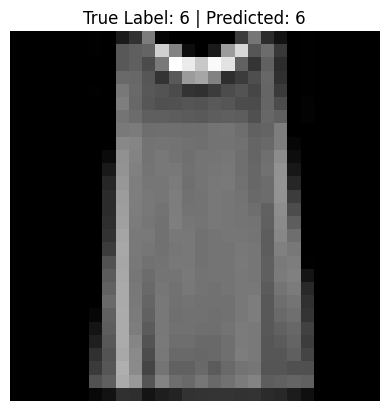

In [28]:


import random


# Set the model to evaluation mode
model2.eval()

# Select a random image from the test dataset
random_index = random.randint(0, len(test_data) - 1)  # Random index
random_image, true_label = test_data[random_index]  # Get the random image and its true label

# Add a batch dimension to the image (required for the model)
random_image = random_image.unsqueeze(0).to(device)  # Shape: [1, channels, height, width]

# Pass the random image through the model
with torch.inference_mode():
    random_logits = model2(random_image)
    random_probs = torch.softmax(random_logits, dim=1)  # Convert logits to probabilities
    random_pred = torch.argmax(random_probs, dim=1)  # Get the predicted class

# Display the results
print(f"Random Image Index: {random_index}")
print(f"True Label: {true_label}")
print(f"Predicted Probabilities: {random_probs}")
print(f"Predicted Class: {random_pred.item()}")

# Visualize the random image
plt.imshow(random_image.squeeze().cpu().numpy(), cmap="gray")  # Adjust for grayscale/RGB
plt.title(f"True Label: {true_label} | Predicted: {random_pred.item()}")
plt.axis("off")
plt.show()

#### METRICS
* F1 Score,
* Recall
* Precision
* Confusion metrics

F1 Score: 0.8738
Recall: 0.8713
Precision: 0.8925
Confusion Matrix:
[[579   1  34  17   3   2 360   0   4   0]
 [  1 982   0   8   3   0   4   0   2   0]
 [  3   1 847   4  46   0  99   0   0   0]
 [  3   8  22 872  24   0  69   0   2   0]
 [  0   1  82  20 730   0 166   0   1   0]
 [  0   0   0   0   0 969   0  25   0   6]
 [ 27   4  76  15  42   0 822   0  14   0]
 [  0   0   0   0   0   6   0 982   0  12]
 [  2   0   7   3   2   2   8   5 971   0]
 [  0   0   0   0   0   6   0  35   0 959]]


<Figure size 1000x1000 with 0 Axes>

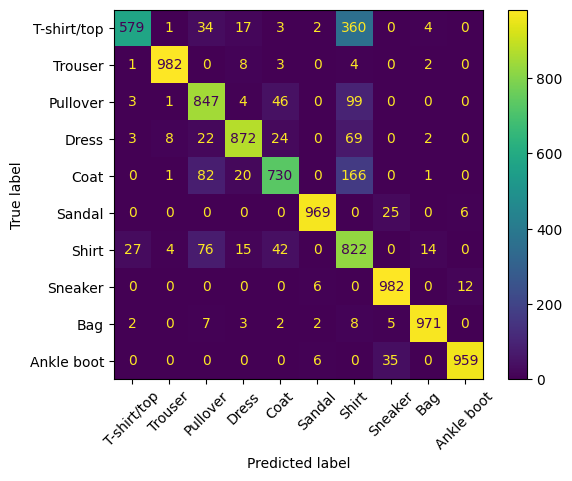

In [37]:
import torch
from sklearn.metrics import (
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np


class_names = train_data.classes
# Set the model to evaluation mode
model2.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Evaluate the model on the test dataset
with torch.inference_mode():
    for X_test, y_test in test_loader:
        X_test, y_test = X_test.to(device), y_test.to(device)

        # Forward pass
        test_logits = model2(X_test)
        test_preds = torch.argmax(test_logits, dim=1)

        # Store predictions and labels
        all_preds.extend(test_preds.cpu().numpy())
        all_labels.extend(y_test.cpu().numpy())

# Convert lists to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate metrics
f1 = f1_score(all_labels, all_preds, average="weighted", zero_division=0)
recall = recall_score(all_labels, all_preds, average="weighted", zero_division=0)
precision = precision_score(all_labels, all_preds, average="weighted", zero_division=0)
conf_matrix = confusion_matrix(all_labels, all_preds)

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
plt.figure(figsize=(10, 10))
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot()
plt.xticks(rotation=45)
plt.show()

In [38]:
# Save model weights only
torch.save(model2.state_dict(), "model_weights.pth")

# Save entire model
torch.save(model2, "model.pth")

In [42]:
# Load weights into a new model instance
torch.manual_seed(42)
modelv3 = ModelV2(input_shape = 1,
                  hidden_units = 10,
                  output_shape = len(classes)).to(device)

modelv3.load_state_dict(torch.load("model_weights.pth",weights_only=True))
modelv3.eval()  # Set to evaluation mode

ModelV2(
  (Conv_Block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv_Block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [44]:
# Evaluate model 3

modelv3.eval()
with torch.inference_mode():
  for x_test, y_test in tqdm(test_loader):
    x_test, y_test = x_test.to(device), y_test.to(device)

    eval_logits = modelv3(x_test)
    eval_pred = torch.argmax(torch.softmax(eval_logits, dim=1), dim = 1)

    eval_loss =  Loss(eval_logits, y_test)
    eval_acc = accuracy_score(y_true = y_test.cpu().numpy(),
                              y_pred = eval_pred.cpu().numpy())*100

print(f'Eval Loss: {eval_loss:.4f} | Eval Acc: {eval_acc:.2f}%')


  0%|          | 0/313 [00:00<?, ?it/s]

Eval Loss: 0.2282 | Eval Acc: 87.50%
